# <a id='toc1_'></a>[For users, appearance matters](#toc0_)

# <a id='toc2_'></a>[Context](#toc0_)

You work for a company that sells food products. You have to investigate the user behavior for the application of the company.

The design team wants to change the font for the entire application, but the management team is concerned that users will find the new design intimidating. That's why they decide to do an A/A/B test. 

# <a id='toc0_'></a>[Table of contents](#toc0_)
  
- [For users, appearance matters](#toc1_)    
- [Context](#toc2_)    
- [Table of contents](#toc0_)    
- [Introduction](#toc4_)    
- [Data Exploration](#toc5_)    
- [Data Preparation](#toc6_)    
- [Data study and information verification](#toc7_)    
  - [How many events are in the logs?](#toc7_1_)    
  - [How many users are in the logs?](#toc7_2_)    
  - [What is the mean value of events per user?](#toc7_3_)    
  - [What is the period of time of the data?](#toc7_4_)    
- [Study of the event funnel](#toc8_)    
  - [Event Frequency](#toc8_1_)    
  - [User quantity for each event](#toc8_2_)    
  - [Event Order](#toc8_3_)    
  - [Event Funnel](#toc8_4_)    
  - [At witch stage we lose more users?](#toc8_5_)    
  - [What is the percentage of users that complete all the stages of the events?](#toc8_6_)    
- [Study the results of the A/A/B test](#toc9_)    
  - [There is a statistical difference between the samples of groups A/A](#toc9_1_)    
  - [Select the most popular event and compare the results of each group.](#toc9_2_)    
    - [MainScreenAppear Event:](#toc9_2_1_)    
    - [OffersScreenAppear Event:](#toc9_2_2_)    
    - [CartScreenAppear Event:](#toc9_2_3_)    
    - [PaymentScreenSuccessful Event](#toc9_2_4_)    
  - [Significance level](#toc9_3_)    
- [Conclusions](#toc10_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->


# <a id='toc4_'></a>[Introduction](#toc0_)

The design and management teams require an analysis of an A/A/B test, the objective it's to perform a general analysis where we can visualize the number of users that reach the purchase stage. Also the design team decided to change the font for the entire application so the management team perform an A/A/B test to visualize the user behavior. 

This investigations are going to be segmented in five steps:

1. Data exploration

2. Data preparation

3. Data study and information verification

4. Study of the event funnel

5. Study the results of the A/A/B test

We will explain each step in the development of the project. 

# <a id='toc5_'></a>[Data Exploration](#toc0_)

In this step we are going to load the data and review the content also, we are going to load the libraries that we are going to use throughout the project. 

In [1]:
# Libraries Load
import pandas as pd
import scipy.stats as st
import numpy as np
import math as mth
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Data Load
data = pd.read_csv("./datasets/logs_exp_us.csv", sep="\t")

print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None
       DeviceIDHash  EventTimestamp          ExpId
count  2.441260e+05    2.441260e+05  244126.000000
mean   4.627568e+18    1.564914e+09     247.022296
std    2.642425e+18    1.771343e+05       0.824434
min    6.888747e+15    1.564030e+09     246.000000
25%    2.372212e+18    1.564757e+09     246.000000
50%    4.623192e+18    1.564919e+09     247.000000
75%    6.932517e+18    1.565075e+09     248.000000
max    9.222603e+18    1.565213e+09     248.000000


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


The dataset provided has the following description for each column: 

* `EventName`: Name of the event
* `DeviceIDHash`: ID of the user
* `EventTimestamp`: Event hour
* `ExpId`: number of the experiment, 246 and 247 are the groups of control, 248 is the test group

So we can conclude that the type of data for the columns `DeviceIDHash`, `EventTimestamp` and `ExpId` are incorrect also, the name for each column aren't so descriptive. In the next section we are going to correct this problems. 



# <a id='toc6_'></a>[Data Preparation](#toc0_)

In this section we are going to correct the problems that we detect in the previous section. 

To recap, we need to correct the following aspects: 

* Change the data type for the mentioned columns

* Change the name for each column 

Also we are going to analyze if the data have missing values, duplicates and add new columns with the date separated.

Having clarified the above, we shall continue with the procedure.

In [3]:
# Changing the name of the columns 
data.columns = ['event_name', 'user_id', 'event_date', 'grp_num']

# Changing the data type 
data['user_id'] = data['user_id'].astype('object')
data['event_date'] = pd.to_datetime(data['event_date'], unit='s')
data['grp_num'] = data['grp_num'].astype('object')

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   user_id     244126 non-null  object        
 2   event_date  244126 non-null  datetime64[ns]
 3   grp_num     244126 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 7.5+ MB
None


,event_name,user_id,event_date,grp_num
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


Now the columns have more descriptive names and the data type for each column are correct also, we can see that there isn't empty values, let's look for duplicates.

In [4]:
# Searching for duplicates
print(data[data.duplicated()])
print(data.duplicated().sum())

                     event_name              user_id          event_date  \
453            MainScreenAppear  5613408041324010552 2019-07-30 08:19:44   
2350           CartScreenAppear  1694940645335807244 2019-07-31 21:51:39   
3573           MainScreenAppear   434103746454591587 2019-08-01 02:59:37   
4076           MainScreenAppear  3761373764179762633 2019-08-01 03:47:46   
4803           MainScreenAppear  2835328739789306622 2019-08-01 04:44:01   
...                         ...                  ...                 ...   
242329         MainScreenAppear  8870358373313968633 2019-08-07 19:26:44   
242332  PaymentScreenSuccessful  4718002964983105693 2019-08-07 19:26:45   
242360  PaymentScreenSuccessful  2382591782303281935 2019-08-07 19:27:29   
242362         CartScreenAppear  2382591782303281935 2019-08-07 19:27:29   
242635         MainScreenAppear  4097782667445790512 2019-08-07 19:36:58   

       grp_num  
453        248  
2350       248  
3573       248  
4076       247  
48

It seems that we have 413 duplicates, we can be sure that this information is duplicated because it can not happen the same event with the same user in the same time, so we are going to drop this duplicates values.

In [5]:
# Drop duplicates
data = data.drop_duplicates().reset_index(drop=True)

# Verify the changes
print(data.duplicated().sum())

0


Now we are going to make new columns with the date separated by date and hour.

In [6]:
# Separate the date
data['date'] = data['event_date'].dt.date
data['hour'] = data['event_date'].dt.time

# Verify the columns
data.head()

,event_name,user_id,event_date,grp_num,date,hour
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42


Now we have all the data prepared for the analysis, so let's continue. 

# <a id='toc7_'></a>[Data study and information verification](#toc0_)

For this section we are going to respond the following questions: 

* Hoy many events are in the logs? 

* Hoy many users are in the logs? 

* What is the mean value of events per user? 

* What is the period of time of the data? 

let's begin with the procedure.

## <a id='toc7_1_'></a>[How many events are in the logs?](#toc0_)

For this section we are going to look for unique values of the column `event_name`.

In [7]:
# Looking for unique values of the column "event_name"
print("The events in the logs are: ", data['event_name'].unique())

The events in the logs are:  ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']


In [8]:
data.groupby('event_name')['user_id'].count()

event_name
CartScreenAppear            42668
MainScreenAppear           119101
OffersScreenAppear          46808
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: user_id, dtype: int64

There are five events:

1. MainScreenAppear
2. PaymentScreenSuccessful
3. CartScreenAppear
4. OffersScreenAppear
5. Tutorial

Also we can see witch event is more common to happen. 

Let's continue with the next section.

## <a id='toc7_2_'></a>[How many users are in the logs?](#toc0_)

Let's count the number of users in the logs proportioned.

In [9]:
# Counting the number of users in the logs
print("The number of users in the logs are: ", data['user_id'].nunique())

The number of users in the logs are:  7551


In the logs proportioned are 7551 unique users.

## <a id='toc7_3_'></a>[What is the mean value of events per user?](#toc0_)

For this section we are going to group the logs for user, then we are going to calculate the mean number of events for each user.

In [10]:
# Grouping for "user_id"
users = data.groupby('user_id',as_index=False).agg({'event_name': 'count'})
users.columns = ['user_id', 'event_count']

# Calculating the mean number of events for user
print("The mean events for user is: ", users.event_count.mean())

The mean events for user is:  32.27559263673685


The mean number of events per user are 32.

 

## <a id='toc7_4_'></a>[What is the period of time of the data?](#toc0_)

For this section we are going to investigate the first date and the last date of the logs.

In [11]:
# Finding the first and last date of the logs
print("The first date of the logs is: ", data['event_date'].min())

print("The last date of the logs is: ", data['event_date'].max())

The first date of the logs is:  2019-07-25 04:43:36
The last date of the logs is:  2019-08-07 21:15:17


The period of time of the logs are from July 25 of 2019 at 04:43 to August 07 of 2019 ata 21:15. Now lets plot the number logs for each date.

In [12]:
data.head()

,event_name,user_id,event_date,grp_num,date,hour
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42


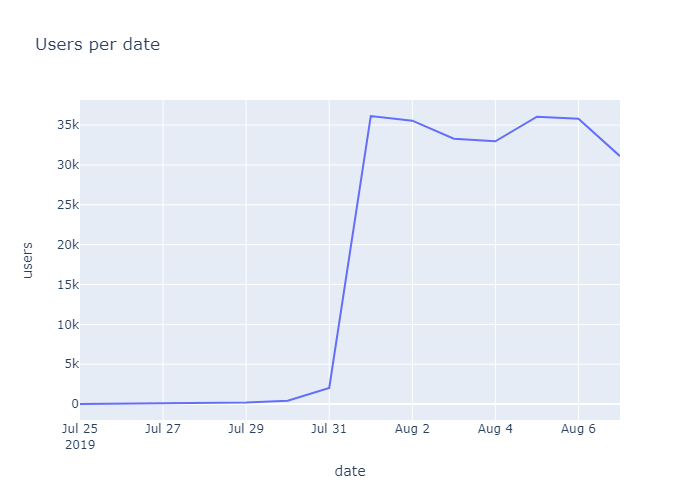

In [13]:
# Grouping for date
users_per_date = data.groupby('date', as_index=False).agg({'user_id': 'count'})
users_per_date.columns = ['date', 'users']

# Plot the result
fig = px.line(users_per_date,
            x='date',
            y='users',
            title="Users per date")
fig.show("png")

In this plot we can see the activity of the users in the period of time of the logs, we notice that the activity of the users are really low at the beginning of the experiment, also we can see a growth of activity of the users since July 31, so we are going to decide to filter the information from that date (July 31 of 2019).

In [14]:
# Data filter
data_filtered = data[data['date'] > pd.to_datetime('2019-07-31').date()]

data_filtered.head()

,event_name,user_id,event_date,grp_num,date,hour
2826,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,00:07:28
2827,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,00:08:00
2828,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,00:08:55
2829,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,00:08:58
2830,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,00:08:59


Now let's see the impact of this changes in the information in the data.

In [15]:
# Counting the number of users in the logs
print("The number of users in the logs are: ", data_filtered['user_id'].nunique())

# Grouping for "user_id"
users = data_filtered.groupby('user_id',as_index=False).agg({'event_name': 'count'})
users.columns = ['user_id', 'event_count']

# Calculating the mean number of events for user
print("The mean events for user is: ", users.event_count.mean())

The number of users in the logs are:  7534
The mean events for user is:  31.97332094504911


According to this information, there are 17 users less but, the mean events for user is still 32.

Let's review the number of users for each experiment group. 

In [16]:
# Grouping for experiment group
exp_groups = data_filtered.groupby('grp_num', as_index=False).agg({'user_id': 'nunique'})
exp_groups

,grp_num,user_id
0,246,2484
1,247,2513
2,248,2537


As we can see the size of the experiment groups are similar, so we can conclude that, based in the previous results, the filter chosen will not affect the results of the analysis. Let's continue with the next section. 

# <a id='toc8_'></a>[Study of the event funnel](#toc0_)

In this section we are going to investigate the following points: 

* Event frequency

* User quantity for each event

* Event order

* Event Funnel

* At witch stage we lose more users? 

* What is the percentage of users that complete all the stages of the events? 

Let's begin. 

## <a id='toc8_1_'></a>[Event Frequency](#toc0_)

In this section we are going to group the data for event name and we are going to count the number of apparitions.

,event_name,frequency
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


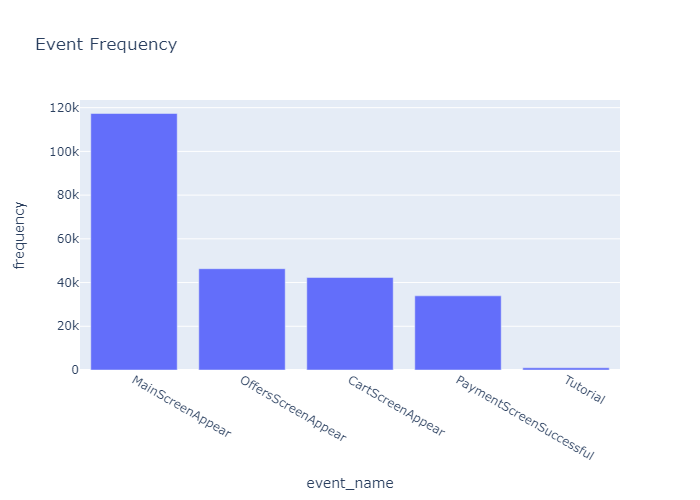

In [17]:
# Grouping for event name
event_frequency = (data_filtered.
                groupby('event_name', as_index=False).
                agg({'user_id':'count'}))
event_frequency.columns = ['event_name','frequency']
event_frequency = event_frequency.sort_values(by='frequency',
                                            ascending=False)

display(event_frequency)

# Plot the result
fig = px.bar(event_frequency,
            x='event_name',
            y='frequency',
            title="Event Frequency")

fig.show("png")

The `MainScreenAppear` event is the most frequency event. 

## <a id='toc8_2_'></a>[User quantity for each event](#toc0_)

Now we are going to visualice the number of users in each event.

,event_name,users
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
0,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


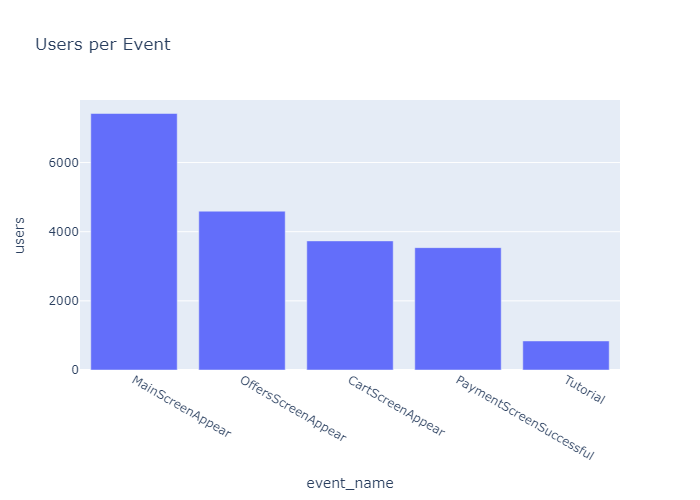

In [18]:
# Grouping for event name
user_per_event = (data_filtered.
                groupby(by='event_name', as_index=False).
                agg({'user_id':'nunique'}))
user_per_event.columns = ['event_name','users']
user_per_event = user_per_event.sort_values(by='users',
                                            ascending=False)

display(user_per_event)

# Plot the result
fig = px.bar(user_per_event,
            x='event_name',
            y='users',
            title="Users per Event")

fig.show("png")

In this graph we can see the user distribution for each event and we can begin to visualize the event funnel. Also we can see that the `Tutorial` event contains only a few users, we can ignore this event, because is a event that is out of the funnel. 

## <a id='toc8_3_'></a>[Event Order](#toc0_)

According to the previous results we can guess the following Event Order: 

1. `MainScreenAppear`
2. `OffersScreenAppear`
3. `CartScreenAppear`
4. `PaymentScreenSuccessful`

## <a id='toc8_4_'></a>[Event Funnel](#toc0_)

Once that we decided that the `Tutorial` event is going to stay out of the investigation, we are going to filter the data only for the events that are relevant and after that we are going to plot the event funnel. 

In [19]:
# Data filter of events
event_filter = data_filtered[~(data_filtered['event_name'] == "Tutorial")]

print(event_filter['event_name'].unique())

['MainScreenAppear' 'OffersScreenAppear' 'CartScreenAppear'
 'PaymentScreenSuccessful']


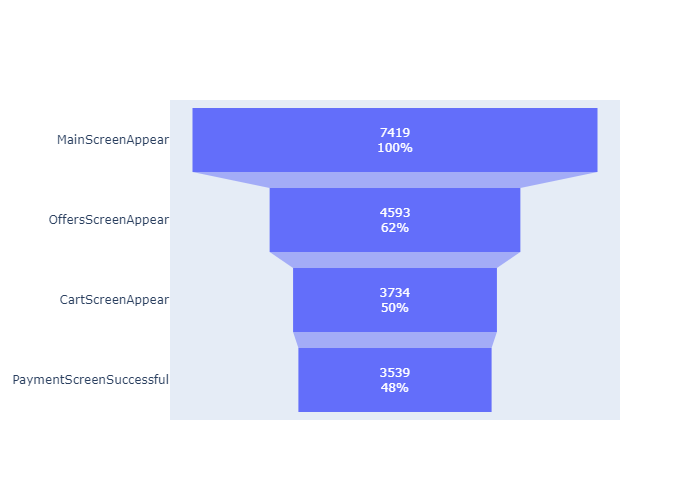

In [20]:
# Grouping by event name and counting the frequency
event_funnel = event_filter.groupby(by='event_name', as_index=False).agg({'user_id': 'nunique'})
event_funnel.columns = ['event_name', 'users']
event_funnel = event_funnel.sort_values(by='users', ascending=False)

# Plot the result
fig = go.Figure(go.Funnel(
    y=event_funnel['event_name'],
    x=event_funnel['users'],
    textinfo="value+percent initial"
))

fig.show("png")

Once we have the funnel let's continue with the next section.

## <a id='toc8_5_'></a>[At witch stage we lose more users?](#toc0_)

For this section we are going to generate a table with the conversion percentage for the previous step and the dropoff percentage. 

In [21]:
# Generate the conversions for each step
event_funnel['users_in_pre_step'] = event_funnel['users'].shift(1)
event_funnel['conversion_pre_step'] = event_funnel['users'] / event_funnel['users_in_pre_step']
event_funnel['dropoff_rate'] = 1-event_funnel['conversion_pre_step']

display(event_funnel)

,event_name,users,users_in_pre_step,conversion_pre_step,dropoff_rate
1,MainScreenAppear,7419,NaN,NaN,NaN
2,OffersScreenAppear,4593,7419.0,0.619086,0.380914
0,CartScreenAppear,3734,4593.0,0.812976,0.187024
3,PaymentScreenSuccessful,3539,3734.0,0.947777,0.052223


As we can see, the step that we lose more users is in the `OffersScreenAppear` event with a 38% of dropoff percentage of users. 



## <a id='toc8_6_'></a>[What is the percentage of users that complete all the stages of the events?](#toc0_)

As we can see in the previous graph, we can see that the percentage of users that complete all the stages of the events are 48%. 

# <a id='toc9_'></a>[Study the results of the A/A/B test](#toc0_)

In this section we are going to review the following points: 

* There is a statistical difference between the samples of groups A/A (246 - 247).

* Select the most popular event and compare the results of each group.

* Compare the statistical difference between the samples of the group of the altered fonts.

In previous results we find that for each group we have the following users:

* A (246) -> 2484 users
* A (247) -> 2513 users
* B (248) -> 2537 users

To make all the points of this section more easy to investigate we are going to create a DataFrame with all the users and the number of the experimental group and we are going to drop all the duplicates, so we can only have the unique values of the id of the users.

In [22]:
# Variables for the users in each group: 
users_246 = 2484
users_247 = 2513
users_248 = 2537

In [23]:
# Creating a Dataframe only with the unique user_id and the experimental group
conversion = data_filtered[['user_id', 'grp_num']].drop_duplicates()
conversion.head()

,user_id,grp_num
2826,3737462046622621720,246
2830,1433840883824088890,247
2831,4899590676214355127,247
2838,1182179323890311443,246
2842,4613461174774205834,248


Once we have this Dataframe, lets begin with the first point of this section: 

## <a id='toc9_1_'></a>[There is a statistical difference between the samples of groups A/A](#toc0_)

To prove this, we need to compare the conversion of this two groups, so lets see witch users complete the purchase step. 

In [24]:
# Filter the users that complete the purchase step
buy_users = pd.DataFrame(data = {
    'user_id': data_filtered[data_filtered['event_name']=="PaymentScreenSuccessful"]['user_id'].unique(),
    'converted':1})

buy_users.head()

,user_id,converted
0,4613461174774205834,1
1,2712290788139738557,1
2,6049698452889664846,1
3,5653442602434498252,1
4,6126676435667432321,1


In [25]:
# Merge the Dataframes
converted = conversion.merge(buy_users, on = 'user_id', how = 'left')
converted['converted'] = converted['converted'].fillna(0)
converted.head()

,user_id,grp_num,converted
0,3737462046622621720,246,1.0
1,1433840883824088890,247,0.0
2,4899590676214355127,247,1.0
3,1182179323890311443,246,0.0
4,4613461174774205834,248,1.0


Once we have this information lets segment the users in groups. 

In [26]:
# Segment users in groups
group_246 = converted[converted['grp_num'] == 246]['converted'].sum()
group_247 = converted[converted['grp_num'] == 247]['converted'].sum()


We have all the information to test the hypothesis of this section: 

* H0: The average conversion rate between groups 246 and 247 are equal. 
* H1: The average conversion rate between groups 246 and 247 are different.

In [27]:
# Establish alpha:
alpha = 0.1

# Performing the test

# Success proportion group 246
p1 = group_246/users_246
# Success proportion group 247
p2 = group_247/users_247

# Proportion of success for the dataset merged
p_combined = (group_246 + group_247)/(users_246 + users_247)

# Deference between the proportions of the datasets
difference = p1 - p2

# Calculate the z_value
z_value = difference / mth.sqrt(p_combined * (1-p_combined)*(1/users_246 + 1/users_247))

# Establish the normal distribution 
distr = st.norm(0,1)

# Calculate p_value
p_value = (1-distr.cdf(abs(z_value))) * 2

# Compare the p value with alpha
if p_value < alpha:
    print("Ho rejected")
else:
    print("We can't reject H0")

We can't reject H0


As we can see, the groups 246 and 247 are equal. 

## <a id='toc9_2_'></a>[Select the most popular event and compare the results of each group.](#toc0_)

For this section we are going to select the event `MainScreenAppear`, and we are going to compare the statistical difference for all the groups, also we are going to do this procedure to all events. To solve this section we are going to create a function to help us to solve this section.

In [28]:
# Function for comparación of groups
def comp_group(event):
    
    # Filter the users that complete the purchase step
    buy_users = pd.DataFrame(data = {
        'user_id': data_filtered[data_filtered['event_name']==event]['user_id'].unique(),
        'converted':1})
    
    # Merge the Dataframes
    converted = conversion.merge(buy_users, on = 'user_id', how = 'left')
    converted['converted'] = converted['converted'].fillna(0)
    
    # Segment users in groups
    group_246 = converted[converted['grp_num'] == 246]['converted'].sum()
    group_247 = converted[converted['grp_num'] == 247]['converted'].sum()
    group_248 = converted[converted['grp_num'] == 248]['converted'].sum()
    control_group = converted[~(converted['grp_num'] == 248)]['converted'].sum()
    
    # Establish alpha:
    alpha = 0.1
    # Calculate the bonferroni alpha
    bonferroni_alpha = alpha/12
    
    # Success proportion group 246
    p1 = group_246/users_246
    # Success proportion group 247
    p2 = group_247/users_247
    # Success proportion group 248
    p3 = group_248/users_248
    # Success proportion control group
    p4 = control_group/(users_246 + users_247)

    # Proportion of success for the datasets merged
    p_combined1 = (group_246 + group_248)/(users_246 + users_248)
    p_combined2 = (group_247 + group_248)/(users_247 + users_248)
    p_combined3 = (control_group + group_248)/(users_246 + users_247 + users_248)
    
    # Deference between the proportions of the datasets
    difference1 = p1 - p3
    difference2 = p2 - p3
    difference3 = p4 - p3
    
    # Calculate the z_value
    z_value1 = difference1 / mth.sqrt(p_combined1 * (1-p_combined1) * (1/users_246 + 1/users_248))
    z_value2 = difference2 / mth.sqrt(p_combined2 * (1-p_combined2) * (1/users_247 + 1/users_248))
    z_value3 = difference3 / mth.sqrt(p_combined3 * (1-p_combined3) * (1/(users_246+users_247) + 1/users_248))
    
    # Calculate p_value
    p_value1 = (1-distr.cdf(abs(z_value1))) * 2
    p_value2 = (1-distr.cdf(abs(z_value2))) * 2
    p_value3 = (1-distr.cdf(abs(z_value3))) * 2
    
    # Show the results
    print("Comparison between groups 246 and 248")
    
    # Compare the p value with alpha
    if p_value1 < bonferroni_alpha:
        print("Ho rejected")
    else:
        print("We can't reject H0")
    
    # Show the results
    print("Comparison between groups 247 and 248")
    
    # Compare the p value with alpha
    if p_value2 < bonferroni_alpha:
        print("Ho rejected")
    else:
        print("We can't reject H0")
    
    # Show the results
    print("Comparison between groups 246 and 247 with the group 248")
    
    # Compare the p value with alpha
    if p_value3 < bonferroni_alpha:
        print("Ho rejected")
    else:
        print("We can't reject H0")

Now let's begin with the tests.

### <a id='toc9_2_1_'></a>[MainScreenAppear Event:](#toc0_)

In [29]:
# Testing the groups for the event "MainScreenAppear"
comp_group("MainScreenAppear")

Comparison between groups 246 and 248
We can't reject H0
Comparison between groups 247 and 248
We can't reject H0
Comparison between groups 246 and 247 with the group 248
We can't reject H0


For the event `MainScreenAppear` all the groups are equal. 

### <a id='toc9_2_2_'></a>[OffersScreenAppear Event:](#toc0_)

In [30]:
# Testing the groups for the event "OffersScreenAppear"
comp_group("OffersScreenAppear")

Comparison between groups 246 and 248
We can't reject H0
Comparison between groups 247 and 248
We can't reject H0
Comparison between groups 246 and 247 with the group 248
We can't reject H0


For the event `OffersScreenAppear` all the groups are equal.

### <a id='toc9_2_3_'></a>[CartScreenAppear Event:](#toc0_)


In [31]:
# Testing the groups for the event "CartScreenAppear"
comp_group("CartScreenAppear")

Comparison between groups 246 and 248
We can't reject H0
Comparison between groups 247 and 248
We can't reject H0
Comparison between groups 246 and 247 with the group 248
We can't reject H0


For the event `CartScreenAppear` all the groups are equal.

### <a id='toc9_2_4_'></a>[PaymentScreenSuccessful Event](#toc0_)

In [32]:
# Testing the groups for the event "PaymentScreenSuccessful"
comp_group("PaymentScreenSuccessful")

Comparison between groups 246 and 248
We can't reject H0
Comparison between groups 247 and 248
We can't reject H0
Comparison between groups 246 and 247 with the group 248
We can't reject H0


For the event `PaymentScreenSuccessful` all the groups are equal.

With this results we can conclude that all the events doesn't present changes in the groups, that means that the change of all fonts of the application won't impact funnel process of purchases. 

Let's check if we have chosen a correct value for the significance level:

## <a id='toc9_3_'></a>[Significance level](#toc0_)

Finally, we need to corroborate if the value for the significance level is appropriate for this investigation. 

In [33]:
# Corroborate the significance level
n_tests = 12
print("The probability of a false positive is: ", (1-(1-alpha)**n_tests))

The probability of a false positive is:  0.7175704635189999


To chose a correct significance level we are going to perform the correction of Bonferroni, this procedure consist in divide our initial significance level between the number of test that were perform (in our case, 12 tests).

In [34]:
# Corroborate the significance level
bonferroni_alpha = 0.1 / n_tests

print("The bonferroni alpha is: ", bonferroni_alpha)

The bonferroni alpha is:  0.008333333333333333


As we can see, the correct value of alpha for this project is 0.0083. 



# <a id='toc10_'></a>[Conclusions](#toc0_)

According to the previous results we find the following behaviors: 

* There are five types of events that happen in the following order: 
    * MainScreenAppear
    * OffersScreenAppear
    * CartScreenAppear
    * PaymentScreenSuccessful
    * Tutorial -> This Event is only frequently in special cases and it's out of the funnel process.

* Data provided is stable as of July 31, 2019.

* The step that lose more users is the `OffersScreenAppear` event with 35% of dropoff percentage of users. 

* 48% of the users complete all the stages of the events. 

* The experimental groups have approximately the same number of users:
    * A (246) -> 2484 users
    * A (247) -> 2513 users
    * B (248) -> 2537 users

* For all events, the groups are unchanged.

With this results we can conclude that the change of fonts for all the application will not affect the users behavior. The changes can be perform.